# Projeto Prevendo a Ocorrência de Diabetes

Aplicar técnicas de Machine Learning que possa prever se as pessoas têm diabetes quando suas características são especificadas. 

O conjunto de dados faz parte do grande conjunto de dados realizado no National Institutes of Diabetes-Digestive-Kidney Diseases nos EUA. Dados usados para pesquisa de diabetes em mulheres indianas Pima com 21 anos ou mais que vivem em Phoenix, a 5ª maior cidade do Estado do Arizona, nos EUA. A variável de destino é especificada como "resultado"; 1 indica resultado positivo do teste de diabetes, 0 indica negativo.

O conjunto de dados foram coletados do Repositório de Machine Learning da UCI / Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

Descrição das colunas:

- **Pregnancies**: Número de vezes que está grávida

- **Glucose**: Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose

- **BloodPressure**: Pressão arterial diastólica (mm Hg)

- **SkinThickness**: Espessura da dobra cutânea do tríceps (mm)

- **Insulin**: Insulina sérica de 2 horas (mu U/ml)

- **BMI**: Índice de massa corporal (peso em kg/(altura em m)^2)

- **DiabetesPedigreeFunction**: Função hereditária do diabetes

- **Age**: Anos de idade)

- **Outcome**: Variável de classe (0 ou 1) 268 de 768 são 1, as outras são 0



In [58]:
# Carregando as bibliotecas

import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import pickle
%matplotlib inline   

In [2]:
# Carregando o dataset

dataset = pd.read_csv("pima-data.csv")   

In [3]:
# Primeiras linhas

dataset.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
# Informações gerais dos dados

print("------------ Shape ------------")
print(dataset.shape)

print("------------ Types ------------")
print(dataset.dtypes)

print("------------ NAs ------------")
print(dataset.isnull().sum())

------------ Shape ------------
(768, 10)
------------ Types ------------
num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object
------------ NAs ------------
num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64


In [5]:
# Definindo as clases 

classes = {True : 1, False : 0}

dataset["diabetes"] = dataset["diabetes"].map(classes)

dataset.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [6]:
# Identificando a correlação entre as variáveis via tabela

dataset.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


In [7]:
# Correlação entre as variáveis via gráfico

dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,-0.08,0.22
glucose_conc,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.06,0.47
diastolic_bp,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.21,0.07
thickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,1.00,0.07
insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.44,0.13
bmi,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.39,0.29
diab_pred,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.18,0.17
age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,-0.11,0.24
skin,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,1.00,0.07
diabetes,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,0.07,1.00


In [8]:
# Verificando a distribuição dos dados

num_true = len(dataset.loc[dataset['diabetes'] == True])
num_false = len(dataset.loc[dataset['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


### Modelo Rondom Forest

In [9]:
# Separando as variáveis independentes e a variável target

X = dataset.iloc[:, 0:9]
y = dataset.iloc[:, -1]
  
print(y.shape)
print("---------")
print(X.shape)

(768,)
---------
(768, 9)


In [10]:
# Dividindo 70% dos dados para treino e 30% para teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [11]:
modelo = RandomForestClassifier(random_state = 50)
modelo.fit(X_treino, Y_treino)

RandomForestClassifier(random_state=50)

In [12]:
# Verificando os dados de treino
predict_train = modelo.predict(X_treino)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_treino, predict_train)))

Accuracy: 1.0000


In [13]:
# Verificando os dados de teste
predict_test = modelo.predict(X_teste)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_test)))

Accuracy: 0.7532


In [14]:
print("Confusion Matrix")

print(metrics.confusion_matrix(Y_teste, predict_test, labels = [1, 0]))

Confusion Matrix
[[ 46  37]
 [ 20 128]]



### Feature Selection (Seleção de Recursos)

Ter muitos recursos irrelevantes em nossos dados pode não ser tão interessante, além de diminuir a precisão dos modelos. E para que isso 
não ocorra existe uma tecnica de **seleção de recursos**.

**Seleção de Recursos**  é o processo de seleção de um subconjunto de recursos relevantes para uso na construção de modelos. 

Principais vantagens de realizar a seleção de recursos antes de modelar os dados:

- *Reduz o excesso de condições*: dados menos redundantes significam menos oportunidade de tomar decisões com base no ruído.
- *Melhora a precisão*: Dados menos enganosos significam que a precisão da modelagem melhora.
- *Reduz o treinamento Tempo*: Menos dados significam que os algoritmos treinam mais rápido.

Existem vários métodos diferentes de seleção de recursos, nesse projeto irei utilizar a método de *Classificação de Importância de Recursos* 
fornecido pela biblioteca *Scikit-Learn*. 

In [15]:
# Seleção de variáveis preditoras (Feature Selection)

# Construindo o modelo

extra_tree_forest = ExtraTreesClassifier(criterion ='entropy')

In [16]:
# Treinando o modelo
extra_tree_forest.fit(X, y)

ExtraTreesClassifier(criterion='entropy')

In [17]:
# importância de cada recurso
feature_importance = extra_tree_forest.feature_importances_

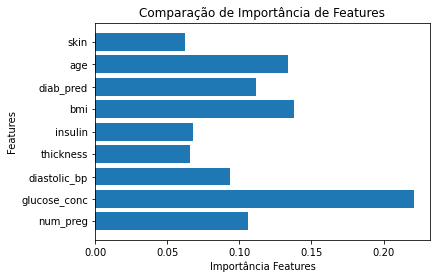

In [18]:
# Plotando um Gráfico de Barras para comparar os modelos
plt.barh(X.columns, feature_importance)
plt.xlabel('Importância Features')
plt.ylabel('Features')
plt.title('Comparação de Importância de Features')
plt.show()

In [19]:
# Seleção das variáveis preditoras

variaveis = ["glucose_conc", "bmi", "age", "diab_pred", "num_preg", "diastolic_bp"]

# Seleção da variável target

target = ["diabetes"]

In [20]:
# Criando objetos

X_var = dataset[variaveis].values
y_targ = dataset[target].values

In [53]:
# Dividindo 70% dos dados para treino e 30% para teste

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_var, y_targ, test_size = 0.30, random_state = 150)

In [54]:
modelo_v2 = RandomForestClassifier(random_state = 150)
modelo_v2.fit(X_treino, Y_treino)

<ipython-input-54-ec6d8fd6b442>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_v2.fit(X_treino, Y_treino)


RandomForestClassifier(random_state=150)

In [55]:
# Verificando os dados de treino
predict_train = modelo_v2.predict(X_treino)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_treino, predict_train)))

Accuracy: 1.0000


In [56]:
# Verificando os dados de teste
predict_test = modelo_v2.predict(X_teste)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_test)))

Accuracy: 0.7532


In [57]:
print("Confusion Matrix")

print(metrics.confusion_matrix(Y_teste, predict_test, labels = [1, 0]))


Confusion Matrix
[[ 44  35]
 [ 22 130]]


In [60]:
# Salvando o modelo treinado

filename = "modelo_treinado.sav"
pickle.dump(modelo_v2, open(filename, "wb"))